# Objective

The goal of this analysis is to explore and identify key factors that influence house prices and to build a predictive model that can estimate the market price of houses based on these attributes.

### Import the required libraries

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
%matplotlib inline

## About the Data Set 

This dataset contains house sale prices for King County, which includes Seattle.

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


### Importing the Data Set

In [3]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath, header=0)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df.describe() # We use the method describe to obtain a statistical summary of the dataframe.

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Data Wrangling

In [6]:
df = df.drop(['Unnamed: 0', 'id'], axis = 1)

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
print("Number of NaN values for the column bedrooms:", df['bedrooms'].isnull().sum())
print("Number of NaN values for the column bathrooms:", df['bathrooms'].isnull().sum())

Number of NaN values for the column bedrooms: 13
Number of NaN values for the column bathrooms: 10


In [9]:
## Repleacing NaN values for the bedrooms column with the mean
mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, mean, inplace = True)
df.isnull().sum()

date              0
price             0
bedrooms          0
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [10]:
## Repleacing the missing values of the column 'bathrooms' with the mean of the column 'brahrooms'
mean = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan, mean, inplace=True)
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Exploratory Data Analysis

We use the <code>value_counts()</code> method to count how many houses have a specific number of floors. This method provides a quick overview of the distribution of houses based on the number of floors. After obtaining the counts, we convert the result into a DataFrame using the <code>.to_frame()</code> method to facilitate its visualization and analysis in a tabular format.

In [11]:
df_floors = df['floors'].value_counts().to_frame()

In [12]:
df_floors.reset_index()

,floors,count
0,1.0,10680
1,2.0,8241
2,1.5,1910
3,3.0,613
4,2.5,161
5,3.5,8


We use the <code>boxplot()</code> function from the Seaborn library to compare the price distributions of houses with a waterfront view and without a waterfront view. This allows us to visually examine the presence of outliers in each category.

<Axes: xlabel='waterfront', ylabel='price'>

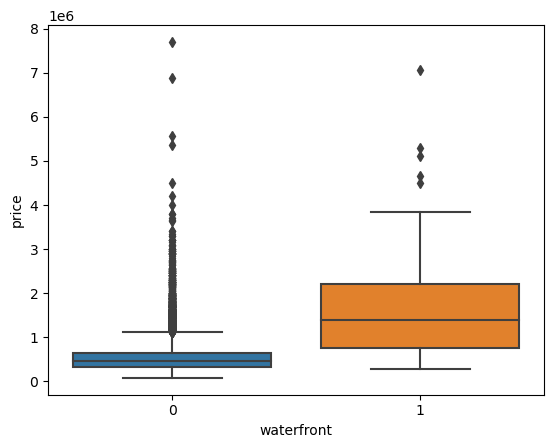

In [13]:
sns.boxplot(x = 'waterfront', y = 'price', data = df)

#### Note:

Based on the boxplot, we can conclude that houses with a waterfront view have more outliers (extreme price values) compared to houses without a waterfront view. ___This suggests that the waterfront feature significantly influences house prices___, leading to a wider range of prices and more extreme values.

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------

We are using the <code>regplot()</code> function from the Seaborn library to visualize and analyze the relationship between the feature sqft_above (the number of square feet built above ground) and the price of the houses. The goal is to determine whether these two variables are positively or negatively correlated.

(0.0, 8081250.0)

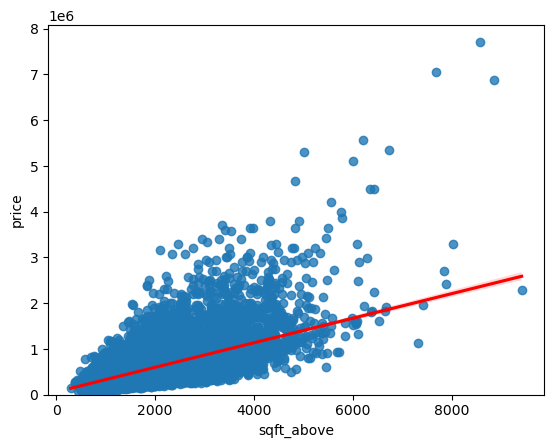

In [14]:
sns.regplot(x = 'sqft_above', y = 'price', data = df, line_kws = {'color': 'red'})
plt.ylim(0,)

#### Note:

The slope of the regression line is positive, indicating that there is a positive correlation between sqft_above (the square footage above ground) and the price of the house. ___However, most of the data points are concentrated in a smaller range of square footage and prices, suggesting that while larger homes tend to have higher prices, the increase in price is not as drastic for the majority of houses___. Additionally, there are a few outliers—particularly houses with more than 6000 sqft—whose prices significantly impact the slope of the regression line. These outliers highlight that, although there is a positive trend, other factors likely play a more significant role in determining price beyond just the size of the house.

In [15]:
correlation_matrix = df.drop(['date'], axis=1)
correlation_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


We use the Pandas method <code>corr()</code> to find the feature other than price that is most correlated with price.

In [16]:
print(correlation_matrix.corr())

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308797   0.525738     0.702035  0.089661  0.256794   
bedrooms       0.308797  1.000000   0.514194     0.578077  0.032307  0.178022   
bathrooms      0.525738  0.514194   1.000000     0.755371  0.087929  0.502132   
sqft_living    0.702035  0.578077   0.755371     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.032307   0.087929     0.172826  1.000000 -0.005201   
floors         0.256794  0.178022   0.502132     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006800   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.080058   0.188341     0.284611  0.074710  0.029444   
condition      0.036362  0.026690  -0.126197    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356589   0.664676     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.479286   0.686309     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.3

### Model Development

We are fitting a linear regression model using the feature **'long'** (longitude) as the independent variable (X) and **'price'** as the dependent variable (Y). The objective is to calculate the R² (coefficient of determination), which tells us how well the linear regression model fits the data.

In [17]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y) # Fitting the model using the feature long
lm.score(X,Y) # R^2 of the model

0.00046769430149007363

Based on the earlier use of the <code>.corr()</code> method, it was expected that the 'long' attribute would have little to no impact on the price of a house, and the low R² value confirms this.

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------

Now we fit a linear regression model to predict price using the feature 'sqft_living' (square footage of living space) as the independent variable, since in the correlation matrix it showed a relatively strong correlation (0.702035) with the dependent variable. As before, we will evaluate the R² to determine how well this model explains the variability in house prices.

In [18]:
## sqft_living  -->  0.702035
X_sqft_living = df[['sqft_living']]
lm2 = LinearRegression()
lm2.fit(X_sqft_living, Y) # Y is the same than the last cell
lm2.score(X_sqft_living, Y)

0.4928532179037931

#### Note
The R² value obtained is 0.4928532179037931, which shows a significant improvement compared to the previous model. However, it still does not provide a strong enough predictive power to be considered a reliable model for predicting house prices using only this single feature.

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------

Since the **R²** values were not high enough when using a single variable, even for the one that showed the highest correlation with price, we now fit a linear regression model to predict house prices using a list of features.

In [19]:
# Linear regression model to predict the 'price' using a list of features
features = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]  ]
X_features = features
lm3 = LinearRegression()
lm3.fit(X_features, Y)
lm3.score(X_features, Y)

0.6576951666037505

#### Note
Despite adding a list of features, the R² value obtained was 0.6576951666037505, which indicates that this model could now predict around 65% of house prices correctly. However, this still leaves a significant margin of error, suggesting that further improvements are needed for more accurate predictions.

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------

To improve the R² value and create a better predictive model, we generate a pipeline where the data will first undergo normalization, followed by polynomial transformation, and finally, we apply linear regression once again. We use the same features as in the previous model.

In [20]:
# Building the pipeline
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]

In [21]:
pipe = Pipeline(Input)
features = X_features.astype(float)
pipe.fit(features, Y) # Y == price
ypipe = pipe.predict(features)
print(r2_score(Y, ypipe))

0.7513323588250258


#### Note
After using the created pipeline, we obtain an __R²__ of ___0.7513___, showing a significant improvement in the predictive power of the model, increasing from 65% to 75%. However, a 25% margin of error still poses potential risks and compromises the reliability of the results.

### Model Evaluation and Refinement

In [22]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 1)

print('Number of test samples:', x_test.shape[0])
print('Number of training samples:', x_train.shape[0])

Number of test samples: 3242
Number of training samples: 18371


After splitting the data into training and testing sets, we generate and fit a Ridge Regression model with the objective of improving the R² value by adding a regularization term (alpha = 0.1).

In [23]:
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test, yhat))

0.6478759163939107


#### Note 
Although the regularization term helps prevent overfitting, the R² value obtained is 0.6479, indicating that the model has a reasonable predictive capacity. However, there is still significant room for improvement, as approximately 35.2% of the variability in house prices remains unexplained by the model.

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------

Now, we apply a second-order polynomial transformation to both the training and testing data in order to capture non-linear relationships between the features and house prices. Afterward, we fit a __Ridge Regression__ model using the transformed data and calculate the **R²** to evaluate the model's performance.

In [24]:
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)
RidgeModel_Poly = Ridge(alpha = 0.1)
RidgeModel_Poly.fit(x_train_pr, y_train)
y_hat = RidgeModel_Poly.predict(x_test_pr)
print(r2_score(y_test, y_hat))

0.7002744263524896


#### Note
Although in this case we applied a second-order polynomial transformation and used a Ridge Regression model, the **R²** value obtained was **0.7003**. This represents a moderate improvement compared to previous models, but it still leaves a 30% margin of error. ___This result suggests that, despite the model's ability to capture non-linear relationships, there are additional factors not being explained, which limits its predictive capacity.___